In [1]:
#import libraries
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPool2D,Input,Flatten,Dropout,Reshape,GlobalAveragePooling2D
from keras.callbacks import Callback,ModelCheckpoint,EarlyStopping
from keras.datasets import mnist
from keras.regularizers import L2
import numpy as np
from keras.utils import to_categorical
import random
import os
import tensorflow as tf





#Data
(X_train,y_train) , (X_test,y_test) =mnist.load_data()
X_train=np.expand_dims(X_train,axis=-1).astype("float32")/255.0
X_test=np.expand_dims(X_test,axis=-1).astype("float32")/255.0
print(X_train.shape)
print(X_test.shape)


model=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32,(3,3),activation="relu",padding="same"),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation="relu",padding="same"),
    MaxPool2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation="relu",padding="same"),
    MaxPool2D(pool_size=(2,2)),



    Dropout(0.25),

    GlobalAveragePooling2D(),
  
    Dense(10,activation="softmax")

])

checkpoint_dir="checkpoints"
os.makedirs(checkpoint_dir,exist_ok=True)


checkpoint_cb=ModelCheckpoint(
    filepath=f"{checkpoint_dir}/.weights.h5",
    save_weights_only=True,
    save_best_only=False,
    verbose=1

)
early_stopping_cb=EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

model.summary()

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])



history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test),callbacks=[checkpoint_cb,early_stopping_cb])




print(model.layers[0].input)
print(model.layers[1].output)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_

1/1 [==============================] - 0s 128ms/step
[[8.5566701e-12 2.0067293e-16 8.1787397e-07 1.8621817e-10 8.7008527e-07
  1.7044332e-06 7.6538943e-13 3.6256273e-07 3.5426101e-08 9.9999630e-01]]


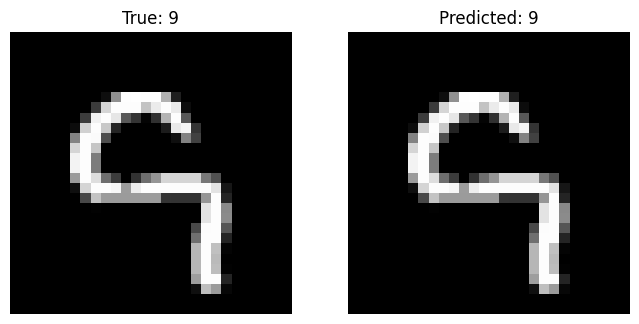

1/1 [==============================] - 0s 40ms/step
[[1.2988445e-14 1.1572729e-08 2.6420050e-08 1.1737498e-12 9.9999988e-01
  3.6186065e-11 3.3721673e-14 1.0835806e-07 2.3960355e-11 1.6140868e-11]]


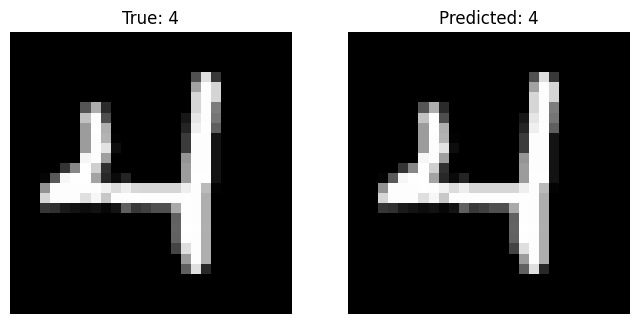

1/1 [==============================] - 0s 32ms/step
[[8.5566701e-12 2.0067293e-16 8.1787397e-07 1.8621817e-10 8.7008527e-07
  1.7044332e-06 7.6538943e-13 3.6256273e-07 3.5426101e-08 9.9999630e-01]]


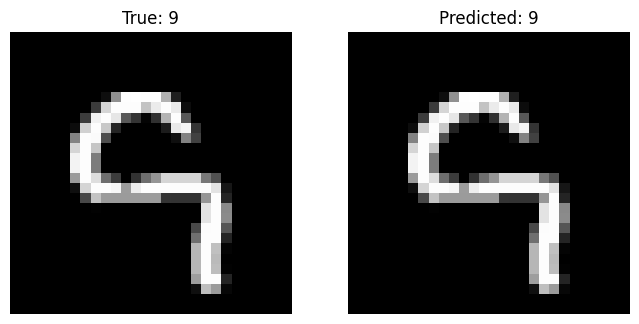

In [2]:
import matplotlib.pyplot as plt

for _ in range(4):
  x = np.random.randint(100, 110)
  y = np.random.randint(100, 110)
  if x > y:
    x, y = y, x

  samples = X_test[x:y]
  labels = y_test[x:y]

  for i, sample in enumerate(samples):
    pred_probs = model.predict(np.expand_dims(sample, axis=0))
    print(pred_probs)
    pred_label = np.argmax(pred_probs)

    plt.figure(figsize=(8, 4))


    plt.subplot(1, 2, 1)
    plt.imshow(sample.squeeze(), cmap='gray')
    plt.title(f"True: {labels[i]}")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(sample.squeeze(), cmap='gray')
    plt.title(f"Predicted: {pred_label}")
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 26ms/step


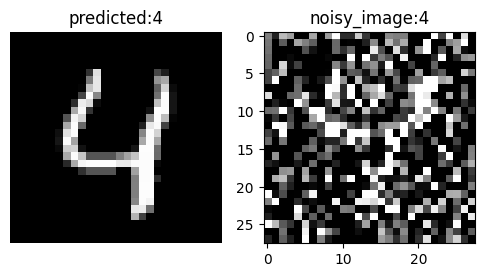

In [3]:

pred_probs=model.predict(np.expand_dims(X_test[6],axis=0))
pred_label=np.argmax(pred_probs)
noise_factor=0.6
X_train_noisy = np.clip(X_train + np.random.normal(0,1, X_train.shape) *noise_factor , 0, 1)
X_test_noisy = np.clip(X_test + np.random.normal(0,1, X_test.shape) * noise_factor, 0, 1)



idx=np.where(y_test==pred_label)[0][0]

pred_image=X_test[idx]


plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(pred_image,cmap="gray")

plt.title(f"predicted:{pred_label}")

plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(X_test_noisy[6].squeeze(),cmap="gray")
plt.title(f"noisy_image:{y_test[6]}")
plt.show()






In [4]:
pred_probs=model.predict(np.expand_dims(X_test[6],axis=0))
pred_label=np.argmax(pred_probs)

1/1 [==============================] - 0s 29ms/step


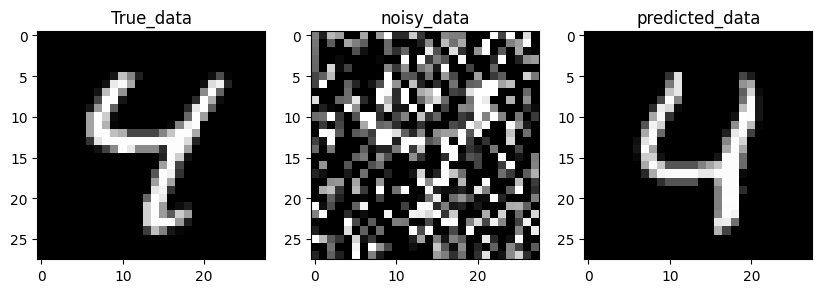

In [5]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(X_test[6].squeeze(),cmap="gray")
plt.title("True_data")

plt.subplot(1,3,2)
plt.imshow(X_test_noisy[6].squeeze(),cmap="gray")
plt.title("noisy_data")

plt.subplot(1,3,3)
plt.title("predicted_data")
idx=np.where(y_test==pred_label)[0][0]
plt.imshow(X_test[idx],cmap="gray")

plt.show()

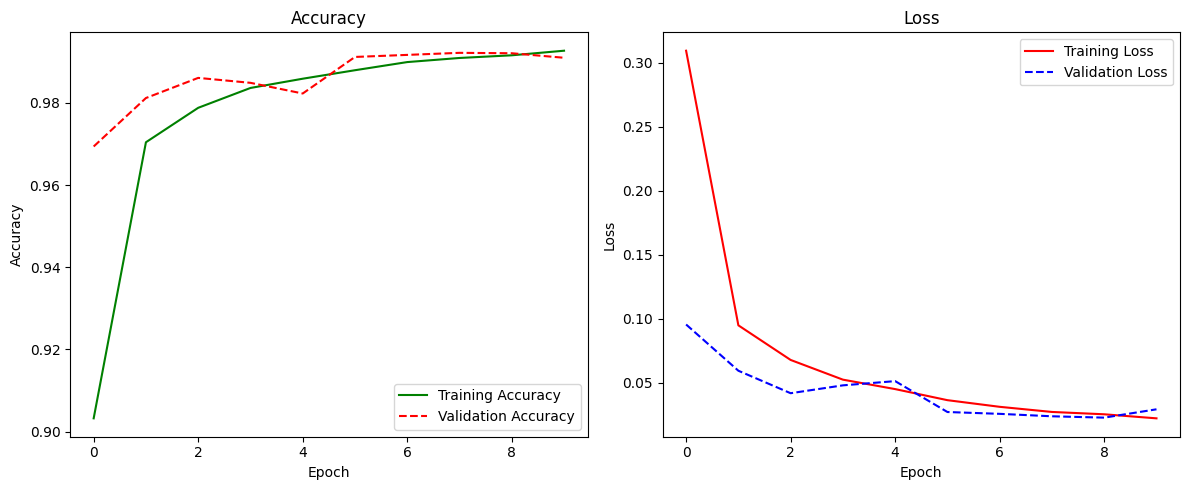

<Figure size 640x480 with 0 Axes>

In [6]:

plt.figure(figsize=(12,5))
history=history.history
plt.subplot(1,2,1)
plt.plot(history["accuracy"],"g", label="Training Accuracy")
plt.plot(history["val_accuracy"],"r--", label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history["loss"],"r", label="Training Loss")
plt.plot(history["val_loss"],"b--", label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig("my_model_plots")

In [7]:
model.save("mymodel.keras")


📌 Project Description

Hello everyone,

This is a practice project for handwritten digit classification using the MNIST dataset.

It is important to clarify that this project is different from a denoising project.
While digit classification focuses on predicting the correct label (0–9) for each image, a denoising project aims to remove noise from images and reconstruct clean versions using models such as Autoencoders.

🧠 Model Architecture & Training

In this project, the neural network architecture was designed as shown in the code.

The model was trained for 10 epochs. Since this is a practice project, the number of epochs was intentionally kept small. However, the number of epochs can be increased to potentially achieve better performance.

One useful feature of this project is that the model weights are saved after each epoch.
This allows:

Restoring the model from any training stage

Analyzing training progress

Visualizing metrics using tools such as TensorBoard

📊 Training Performance

Based on the loss and validation loss curves, the model appears to perform well.
The training and validation trends suggest stable learning behavior without severe overfitting.


📈 Performance Analysis

Based on the training curves over 10 epochs:

Accuracy Analysis

Training accuracy increased from approximately 90% to nearly 99%.

Validation accuracy improved from around 97% to approximately 99%.

The gap between training and validation accuracy is minimal, indicating good generalization.

No significant signs of overfitting were observed.

Loss Analysis

Training loss decreased from approximately 0.30 to about 0.02.

Validation loss decreased from around 0.08 to approximately 0.025.

Both curves show a consistent downward trend.

A slight fluctuation in validation loss around epoch 7 is observed but does not indicate instability.

Final Evaluation

With only 10 training epochs, the model achieved strong performance and stable convergence.
The results suggest that the model effectively learned meaningful patterns from the dataset.

Further performance improvements would likely require architectural changes (e.g., implementing a Convolutional Neural Network) rather than simply increasing the number of epochs.

🙏 Acknowledgment

Thank you for taking the time to review this project.